# Performance of semantle solvers and similarity models

Compare solvers with a sequence of guesses from people

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp

In [1]:
import sys
sys.path.insert(0, 'src')

from cohort_bayes_solver import CohortBayesSolver
from gradient_solver import GradientSolver
from semantle_simulator import SemantleSimulator

import gradient_solver_2 as gs2
import vocabulary as voc
import similarity_model as sm
import performance as perf

## Simulator for semantle

In [2]:
sem_sim = SemantleSimulator()

In [3]:
sample_targets = ['terrible', 'habitat', 'carrot', 'gather', 'amendment', 'worried', 'significant']
sem_sim.target = sample_targets[3]

## Agent similarity model

In [5]:
base_vocabulary_ews = voc.VocabularyEWS()
voc.add_missing_words(base_vocabulary_ews, sample_targets)
base_vocabulary_uf = voc.VocabularyUF()

similarity_w2v_ews = sm.SimilarityModelW2V(base_vocabulary_ews, sem_sim.wv)
similarity_w2v_uf = sm.SimilarityModelW2V(base_vocabulary_uf, sem_sim.wv)
similarity_use_ews = sm.SimilarityModelUSE(base_vocabulary_ews)
similarity_use_uf = sm.SimilarityModelUSE(base_vocabulary_uf)

## Evaluate vocabulary delta cohort w2v

In [6]:
ctor = lambda: CohortBayesSolver(similarity_w2v_ews, precision=0.1, recall=0.5)
trial_cohort_ews, target_cohort_ews = perf.run_trial(ctor, sem_sim, n=10, target_pool=sample_targets)

.

In [7]:
ctor = lambda: CohortBayesSolver(similarity_w2v_uf, precision=0.1, recall=0.5)
trial_cohort_uf, target_cohort_uf = perf.run_trial(ctor, sem_sim, n=10, target_pool=sample_targets)

.

In [8]:
np.mean(trial_cohort_ews), np.mean(trial_cohort_uf), ks_2samp(trial_cohort_ews, trial_cohort_uf)

(54.4, 37.2, KstestResult(statistic=0.3, pvalue=0.7869297884777761))

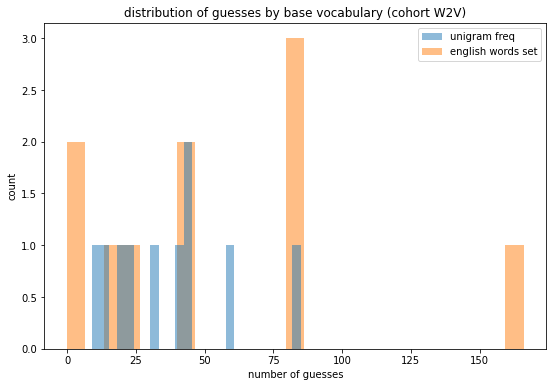

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.hist(trial_cohort_uf, alpha=0.5, bins=25, zorder=100)
plt.hist(trial_cohort_ews, alpha=0.5, bins=25)
plt.legend(['unigram freq', 'english words set'])
plt.title('distribution of guesses by base vocabulary (cohort W2V)')
plt.xlabel('number of guesses')
plt.ylabel('count')
plt.show()

## Evaluate vocabulary delta gradient use

In [37]:
ctor = lambda: GradientSolver(similarity_use_ews)
trial_gradient_ews, target_gradient_ews = perf.run_trial(ctor, sem_sim, n=300, target_pool=sample_targets)

..............................

In [35]:
ctor = lambda: GradientSolver(similarity_use_uf)
trial_gradient_uf, target_gradient_uf = perf.run_trial(ctor, sem_sim, n=300, target_pool=sample_targets)

..............................

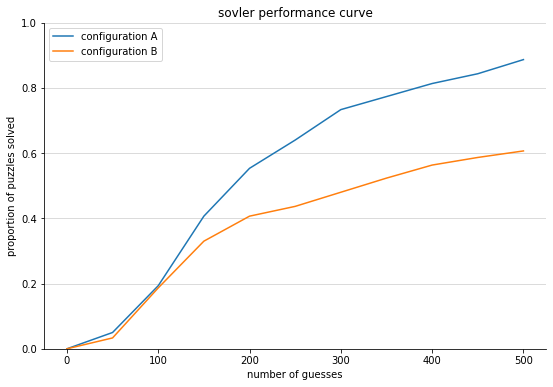

In [52]:
st_ews = sorted(trial_gradient_ews)
st_uf = sorted(trial_gradient_uf)
guess_x = list(range(0, 501, 50))
guess_ratio_ews = [min(range(len(st_ews)), key=lambda i: abs(st_ews[i]-g)) / len(st_ews) for g in guess_x]
guess_ratio_uf = [min(range(len(st_uf)), key=lambda i: abs(st_uf[i]-g)) / len(st_uf) for g in guess_x]
plt.figure(figsize=(9,6))
plt.plot(guess_x, guess_ratio_uf)
plt.plot(guess_x, guess_ratio_ews)
plt.ylim(0, 1)
plt.grid(axis='y', color='lightgrey')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('number of guesses')
plt.ylabel('proportion of puzzles solved')
plt.title('sovler performance curve')
plt.legend(['configuration A', 'configuration B'])
plt.show()

In [17]:
np.mean(trial_gradient_ews), np.mean(trial_gradient_uf), ks_2samp(trial_gradient_ews, trial_gradient_uf)

(297.5, 138.9, KstestResult(statistic=0.5, pvalue=0.16782134274394334))

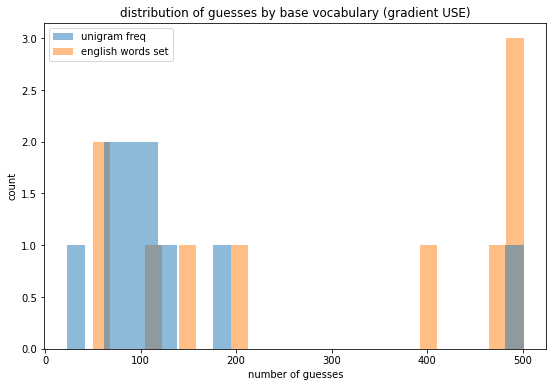

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.hist(trial_gradient_uf, alpha=0.5, bins=25, zorder=100)
plt.hist(trial_gradient_ews, alpha=0.5, bins=25)
plt.legend(['unigram freq', 'english words set'])
plt.title('distribution of guesses by base vocabulary (gradient USE)')
plt.xlabel('number of guesses')
plt.ylabel('count')
plt.show()

In [19]:
capped = np.array(trial_gradient_ews)
np.unique(np.array(target_gradient_ews)[np.argwhere(capped >= 500)], return_counts=True)

(array(['gather', 'habitat'], dtype='<U11'), array([1, 1]))